In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "brazil"        "brics-dataset"

In [2]:
library(tidyverse)
library(readr)

In [3]:
data <- read_csv("../input/brics-dataset/South_Africa.csv")

Rows: 10918 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): DEXSFUS
date (1): DATE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
typeof(data)

[1] "list"

In [5]:
spec(data)

cols(
  DATE = col_date(format = ""),
  DEXSFUS = col_double()
)

In [6]:
del_data = data[data$DATE <= as.Date("1999-12-31", "%Y-%m-%d"), ] 
data = data[data$DATE > as.Date("1999-12-31", "%Y-%m-%d"), ]

In [7]:
data = data[data$DEXSFUS != '.', ]

In [8]:
lengths(data)

DATE DEXSFUS 
   5700    5700

In [9]:
data

DATE,DEXSFUS
<date>,<dbl>
2000-01-03,6.1260
2000-01-04,6.0850
2000-01-05,6.0700
2000-01-06,6.0800
2000-01-07,6.0570
2000-01-10,6.0765
2000-01-11,6.0900
2000-01-12,6.0685
2000-01-13,6.0570


In [10]:
date1 = as.Date("1999-12-31", "%Y-%m-%d")
date2 = data$DATE[length(data$DATE)]     #lengthof data is 5482

In [11]:
length = date2 - date1 #7980
length

Time difference of 7980 days

In [12]:
lst_val = 1:length
lst_val <- as.double(lst_val)

In [13]:
check_date = as.Date("2000-01-01", "%Y-%m-%d")
start_val = del_data$DEXSFUS[length(del_data$DATE)]

In [14]:
if(check_date != data$DATE[1]){
    num_missing = data$DATE[1] - check_date
    val = as.numeric(start_val) + as.numeric(data$DEXSFUS[1])
    val = val/2
    for(i in 1:num_missing){
        lst_val[i] = val
    }
    check_date <- check_date + num_missing
}

In [15]:
lst_val[3]

[1] 3

In [16]:
idx = 3
for (i in 1:length(data$DATE)){    
    if(check_date != data$DATE[i]){
        num_missing <- data$DATE[i] - check_date
        val <- as.numeric(data$DEXSFUS[i-1]) + as.numeric(data$DEXSFUS[i])
        val <- val/2
        for(j in (idx : (idx + as.numeric(num_missing-1)))){
#             print(j)
            lst_val[j] <- val
        }
        
        idx <- idx + as.numeric(num_missing)
        lst_val[idx] <- as.numeric(data$DEXSFUS[i])
        idx <- idx + 1
        check_date <- check_date + num_missing + 1
#         print(check_date)
    }
    
    else{
        lst_val[idx] <- as.numeric(data$DEXSFUS[i])
        idx <- idx + 1
        check_date <- check_date + 1
    }
}

In [17]:
lst_val

[1]  6.14300  6.14300  6.12600  6.08500  6.07000  6.08000  6.05700  6.06675
   [9]  6.06675  6.07650  6.09000  6.06850  6.05700  6.07500  6.07500  6.07500
  [17]  6.07500  6.08900  6.11400  6.10000  6.12800  6.14775  6.14775  6.16750
  [25]  6.16170  6.17500  6.22700  6.35750  6.33500  6.33500  6.31250  6.28000
  [33]  6.28250  6.25750  6.28600  6.28825  6.28825  6.29050  6.29900  6.32000
  [41]  6.34250  6.36100  6.35800  6.35800  6.35500  6.35500  6.33750  6.32500
  [49]  6.32500  6.32500  6.32500  6.32500  6.31300  6.33500  6.32900  6.31200
  [57]  6.34225  6.34225  6.37250  6.34000  6.35250  6.36800  6.49000  6.49500
  [65]  6.49500  6.50000  6.52300  6.48250  6.40250  6.38750  6.41125  6.41125
  [73]  6.43500  6.44000  6.47500  6.45000  6.47000  6.48100  6.48100  6.49200
  [81]  6.48400  6.45750  6.47800  6.48350  6.47425  6.47425  6.46500  6.49000
  [89]  6.51250  6.57900  6.53500  6.55000  6.55000  6.56500  6.56000  6.60250
  [97]  6.57500  6.56100  6.55800  6.55800  6.55500  6.59250  6.57400  6.56450
 [105]  6.58350  6.60225  6.60225  6.62100  6.61000  6.63800  6.70200  6.74000
 [113]  6.73625  6.73625  6.73250  6.73050  6.80500  6.86500  6.78300  6.78400
 [121]  6.78400  6.78500  6.77500  6.84500  6.92250  6.94000  6.94000  6.94000
 [129]  6.94000  7.09000  7.07550  6.97500  7.04000  7.04000  7.04000  7.04000
 [137]  7.07250  7.11750  7.13400  7.18000  7.14875  7.14875  7.11750  7.05500
 [145]  7.11800  7.14750  7.13500  7.13500  7.13500  7.13500  7.05150  6.96750
 [153]  6.98750  6.93000  6.92750  6.92750  6.92500  6.94500  6.97250  7.04750
 [161]  7.00400  7.01600  7.01600  7.02800  7.00500  6.93000  6.90000  6.83000
 [169]  6.84800  6.84800  6.86600  6.90500  6.93000  6.91900  6.88000  6.87900
 [177]  6.87900  6.87800  6.81750  6.81000  6.82250  6.79000  6.80125  6.80125
 [185]  6.81250  6.81250  6.78500  6.85000  6.84500  6.83500  6.83500  6.82500
 [193]  6.81000  6.83500  6.84500  6.89000  6.90875  6.90875  6.92750  6.94750
 [201]  6.98000  6.92250  6.92500  6.94000  6.94000  6.95500  6.96000  6.94500
 [209]  6.94200  6.97500  6.97000  6.97000  6.96500  6.97500  6.99000  7.01000
 [217]  6.96750  6.95950  6.95950  6.95150  6.98500  7.00300  6.95400  6.89900
 [225]  6.90775  6.90775  6.91650  6.94200  6.93750  6.92500  6.94700  6.95450
 [233]  6.95450  6.96200  6.98850  6.96500  6.94900  6.90500  6.92700  6.92700
 [241]  6.94900  6.95250  6.96000  6.97600  6.94500  6.94500  6.94500  6.94500
 [249]  7.03400  7.08500  7.10500  7.09500  7.10500  7.10500  7.11500  7.14200
 [257]  7.10900  7.15000  7.17350  7.22675  7.22675  7.28000  7.29000  7.33500
 [265]  7.31500  7.25000  7.24450  7.24450  7.23900  7.20500  7.25500  7.26800
 [273]  7.21900  7.20825  7.20825  7.19750  7.23500  7.24400  7.27000  7.30000
 [281]  7.30000  7.30000  7.30000  7.37000  7.40200  7.46000  7.49500  7.53625
 [289]  7.53625  7.57750  7.56500  7.71250  7.67000  7.58500  7.58250  7.58250
 [297]  7.58000  7.60050  7.62000  7.68500  7.60600  7.58250  7.58250  7.55900
 [305]  7.56000  7.49870  7.53000  7.53250  7.54025  7.54025  7.54800  7.62400
 [313]  7.66450  7.74250  7.60200  7.62600  7.62600  7.65000  7.65800  7.68900
 [321]  7.68500  7.70750  7.73750  7.73750  7.76750  7.82000  7.83000  7.83000
 [329]  7.83500  7.80300  7.80300  7.77100  7.78750  7.77400  7.75000  7.65500
 [337]  7.65000  7.65000  7.64500  7.65500  7.58200  7.61750  7.64000  7.65400
 [345]  7.65400  7.66800  7.74300  7.77250  7.73750  7.69000  7.68500  7.68500
 [353]  7.68000  7.71500  7.66000  7.63000  7.56750  7.56750  7.56750  7.56750
 [361]  7.55000  7.53750  7.56250  7.57000  7.57000  7.57000  7.57000  7.56900
 [369]  7.50250  7.54300  7.56000  7.57750  7.57750  7.59500  7.72000  7.97800
 [377]  7.84500  7.82500  7.82500  7.82500  7.82500  7.82500  7.85750  7.86750
 [385]  7.87400  7.87200  7.87200  7.87000  7.83500  7.88000  7.86500  7.89500
 [393]  7.88500  7.88500  7.87500  7.80000  7.77000  7.73000  7.77500  7.77625
 [401]  7.77625  7.77750  7.79000  7.88000  7.98750  

In [18]:
print("Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021")
offset = readline()
offset = as.integer(offset)

[1] "Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021"


 1


In [19]:
test_date = as.Date("2021-01-01", "%Y-%m-%d")
if(offset == 0){
    test_date = as.Date("2020-01-01", "%Y-%m-%d")
}

In [20]:
train = lst_val[1: as.numeric(test_date - date1) - 1]

In [21]:
test = lst_val[as.numeric(test_date - date1) : length(lst_val)]

In [22]:
train_week <- list(1 : ceiling(length(train)/7))
for(i in 0 : as.integer(length(train)/7)){
    if(i == as.integer(length(train)/7)){
        train_week[i+1] <- mean(train[((7*i)+1) : (length(train))])
        next
    }

    train_week[i+1] <- mean(train[((7*i)+1) : ((7*i)+7)])
}

In [23]:
test_week <- list(1 : ceiling(length(test)/7))

for(i in 0 : as.integer(length(test)/7)){
    if(i == as.integer(length(test)/7)){
        test_week[i+1] <- mean(test[((7*i)+1) : (length(test))])
        next
    }

    test_week[i+1] <- mean(test[((7*i)+1) : ((7*i)+7)])
}

In [24]:
train <- ts(as.numeric(train_week))
test <- ts(as.numeric(test_week), start = length(train_week)+1,
           end = (length(train_week) + length(test_week)))
#converting to time series

In [25]:
install.packages("WaveletArima")
library(WaveletArima)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [26]:
library(tseries)
library(forecast)
library(Metrics)
library(ggplot2)
library(readr)
# library(WaveletArima)
library(caret)
library(nnfor)
library(tsDyn)
library(fracdiff)
library(bsts)
library(forecastHybrid)
library(e1071)
library(tseriesChaos)
library(pracma)
library(Kendall)
# library(nonlinearTseries)
# library(GeneCycle)
library(fpp2)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Registered S3 method overwritten by 'greybox':
  method     from
  print.pcor lava


Attaching package: ‘tsDyn’


The following object is masked from ‘package:Metrics’:

    mse


Loading required package: BoomSpikeSlab

Loading required package: Boom

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


A

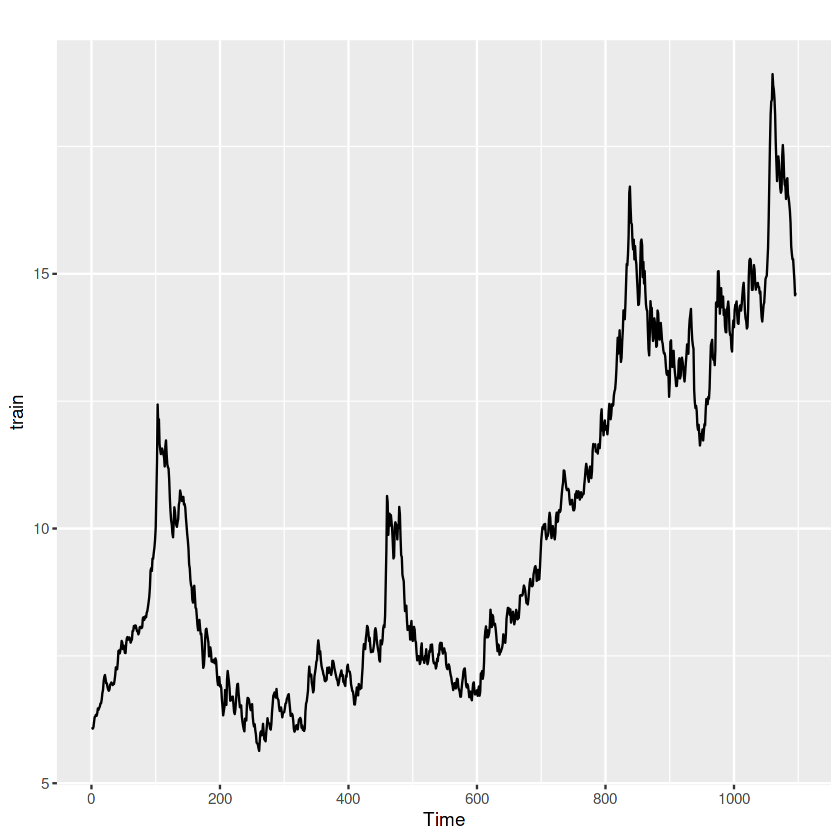

In [27]:
autoplot(train)

In [28]:
#ACF & PACF plots
#diffcase=ndiffs(train)
diffset = diff(train, differences = ndiffs(train))

jpeg(file="ACF_SA.jpeg")
ggAcf(diffset) +
  ggtitle("ACF plot")
dev.off()

jpeg(file="PACF_SA.jpeg")

ggPacf(train) +
  ggtitle("PACF plot")
dev.off()

png 
  2

png 
  2

In [29]:
kpss.test(train)  #p value is < 0.05... So,reject null hypothesis and accept alternative hypothisis which is non stationary 

Warning message in kpss.test(train):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  train
KPSS Level = 9.4708, Truncation lag parameter = 7, p-value = 0.01


In [30]:
Box.test(train)  #p<0.01... So, no seriel correlation exists


	Box-Pierce test

data:  train
X-squared = 1088.2, df = 1, p-value < 2.2e-16


In [31]:
skewness(train)   #Right Skew

[1] 0.739133

In [32]:
kurtosis(train)   #Peaked distribution

[1] -0.6611229

In [33]:
hurstexp(train)  #Which exponent to consider  #Emperical

Simple R/S Hurst estimation:         0.8741194 
Corrected R over S Hurst exponent:   1.008835 
Empirical Hurst exponent:            0.9308451 
Corrected empirical Hurst exponent:  0.9124102 
Theoretical Hurst exponent:          0.5381524 


In [34]:
terasvirta.test(train) 
#Also a test for linearity... p-value is greater than 0.05, hence linear trend


	Teraesvirta Neural Network Test

data:  train
X-squared = 4.012, df = 2, p-value = 0.1345


In [35]:
#Non-Chaotic
max_lyapunov_expo <-lyap_k(train, m=1, d=2, s=1, t=4, ref=length(train), k=2, eps=4); max_lyapunov_expo

Finding nearests
Keeping  1096  reference points
Following points


A Time Series:
[1] -5.254403

# **Models**

In [36]:
library(lmtest)


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ma1 0.326466   0.027389   11.92 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Series: train 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.3265
s.e.  0.0274

sigma^2 estimated as 0.03334:  log likelihood=308.72
AIC=-613.44   AICc=-613.43   BIC=-603.44

Training set error measures:
                      ME      RMSE      MAE        MPE     MAPE      MASE
Training set 0.005899132 0.1824311 0.129258 0.05037158 1.304146 0.9423704
                    ACF1
Training set 0.009333349

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.005899132,0.1824311,0.1292580,0.05037158,1.304146,0.9423704,0.009333349,NA
Test set,-0.053359943,0.4363771,0.3557652,-0.45470906,2.459896,2.5937472,0.805147708,1.738207


[1] 0.0244159

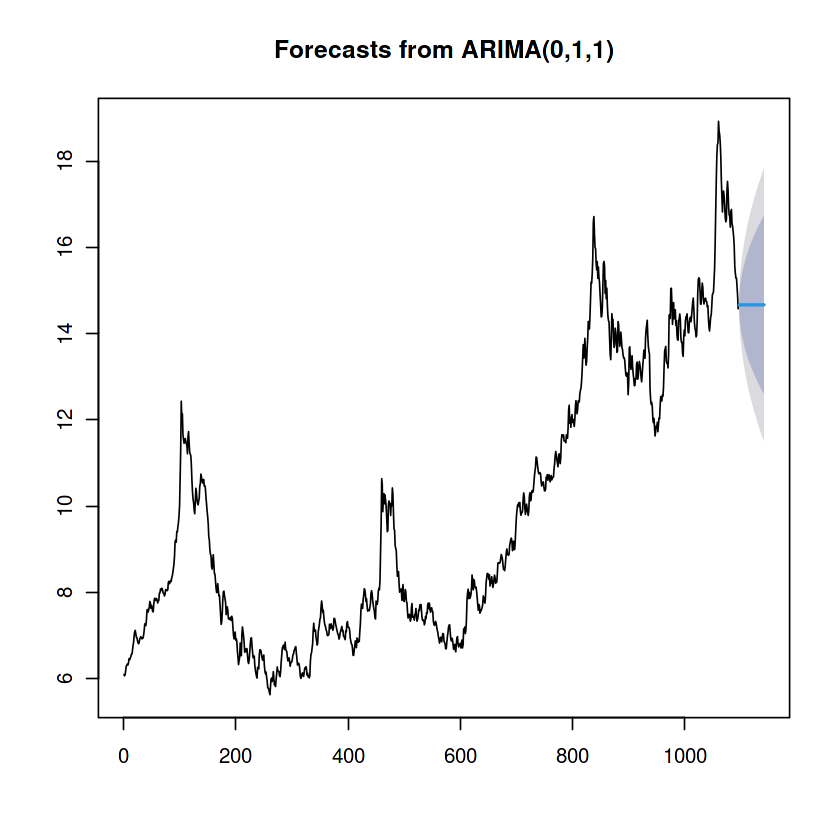

In [37]:
#ARIMA - Classical
fitARIMA = auto.arima(train) 
coeftest(fitARIMA)
summary(fitARIMA)
predARIMA = forecast::forecast(fitARIMA,h=length(test))
plot(predARIMA)

a1<-forecast::accuracy(predARIMA, test);a1
smape(test,predARIMA$mean)

In [38]:
# library(stringi)
# lag = stri_count(toString(summary(fitARIMA)[1]), fixed="ar")

ETS(M,Ad,N) 

Call:
 ets(y = train) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1782 
    phi   = 0.8 

  Initial states:
    l = 5.8139 
    b = 0.1216 

  sigma:  0.0181

     AIC     AICc      BIC 
3769.574 3769.651 3799.570 

Training set error measures:
                      ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.004297775 0.1885835 0.1346765 0.03836158 1.358751 0.9818744
                  ACF1
Training set 0.1780419

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.004297775,0.1885835,0.1346765,0.03836158,1.358751,0.9818744,0.1780419,NA
Test set,0.223645094,0.4727707,0.3979635,1.44618721,2.704065,2.9013990,0.7916711,1.825624


[1] 0.02733002

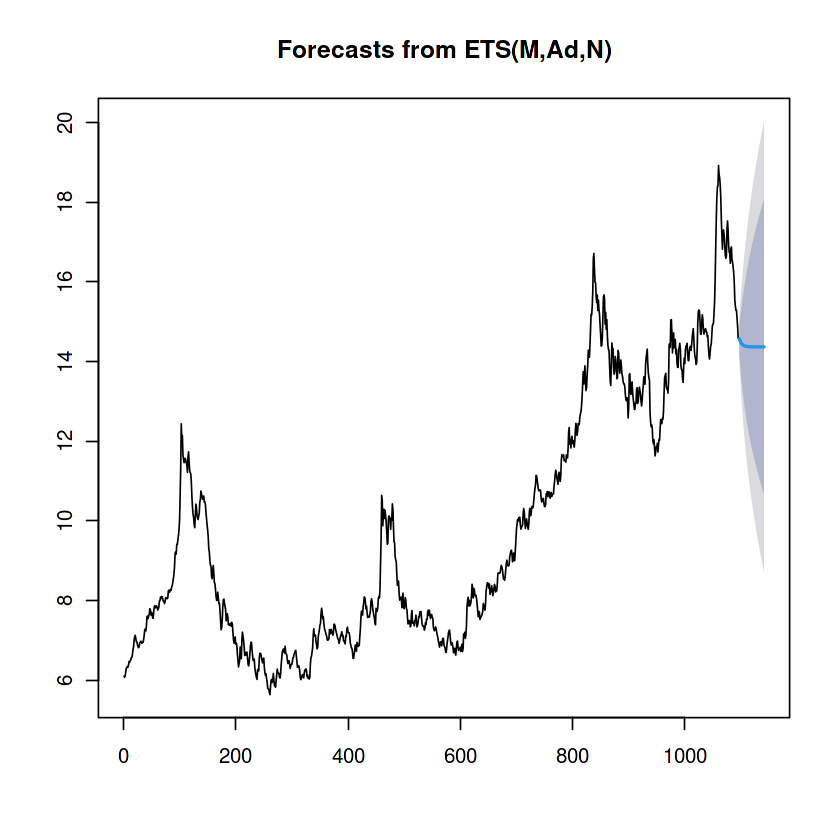

In [39]:
# fitting ETS  -- Smoothing Basic
fitETS=ets(train)
summary(fitETS)
predETS=forecast::forecast(fitETS, h=length(test))
plot(predETS)

a2<-forecast::accuracy(predETS, test);a2
smape(test,predETS$mean)

Warning message:
“Possible unit root in the low  regime. Roots are: 0.996 2.7527 2.7527 7.946”


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.4323249,0.6255207,0.5229666,2.879282,3.538576,0.8068165,2.405238


[1] 0.03619382

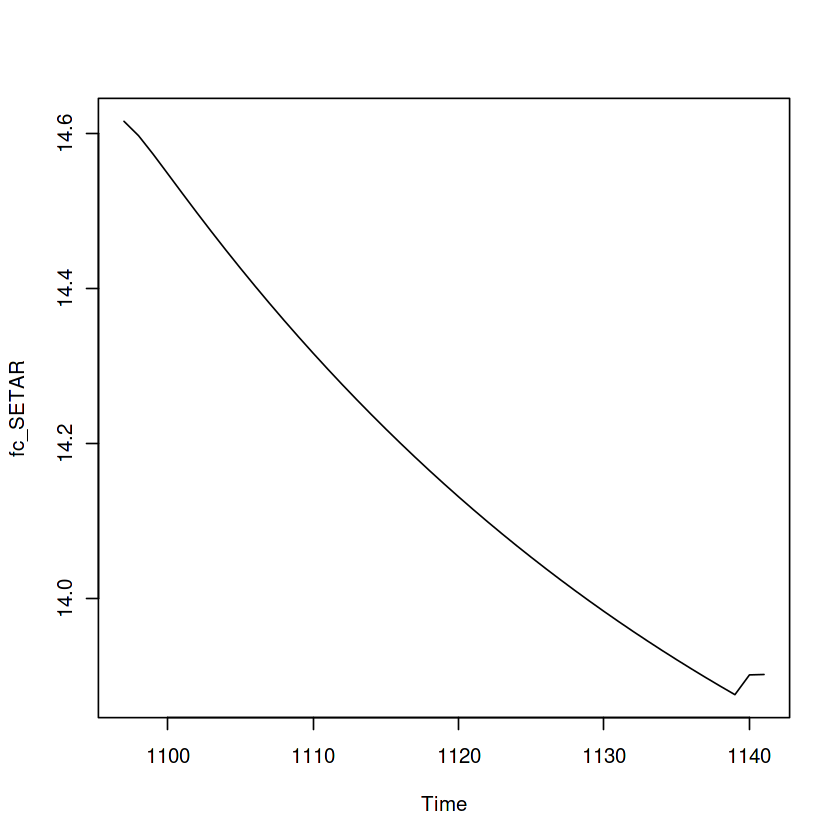

In [40]:
#SETAR - Classical
fit_SETAR = setar(train, m=4)
fc_SETAR = predict(fit_SETAR, n.ahead = length(test))
plot(fc_SETAR)
#How to determine M?

a3<-forecast::accuracy(fc_SETAR, test);a3
smape(test, fc_SETAR)

                  Length Class  Mode     
lambda               1   -none- numeric  
alpha                1   -none- numeric  
beta                 1   -none- numeric  
damping.parameter    1   -none- numeric  
gamma.values         0   -none- NULL     
ar.coefficients      0   -none- NULL     
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states          2   -none- numeric  
fitted.values     1096   ts     numeric  
errors            1096   ts     numeric  
x                 2192   -none- numeric  
seasonal.periods     0   -none- NULL     
y                 1096   ts     numeric  
call                 2   -none- call     
series               1   -none- character
method               1   -none- character

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.003703626,0.1824001,0.1293136,0.0202978,1.305722,0.9427759,0.00362941,NA
Test set,-0.071234557,0.4402672,0.3570912,-0.5773833,2.471910,2.6034146,0.80648066,1.756413


[1] 0.02450616

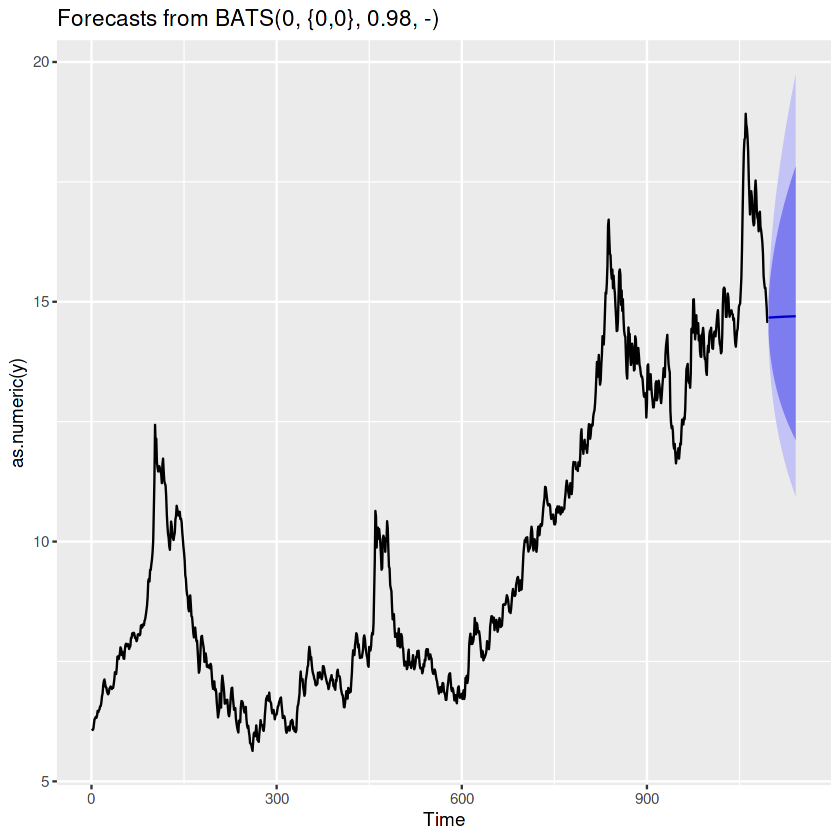

In [41]:
#TBATS - Smotthing
fit_tbats = tbats(train)
summary(fit_tbats)
predTBATS=forecast::forecast(fit_tbats, h=length(test))
autoplot(predTBATS)

a4<-forecast::accuracy(predTBATS, test);a4
smape(test,predTBATS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.1008785,0.4508887,0.3613996,-0.7808167,2.505909,0.8119011,1.79946


[1] 0.02480146

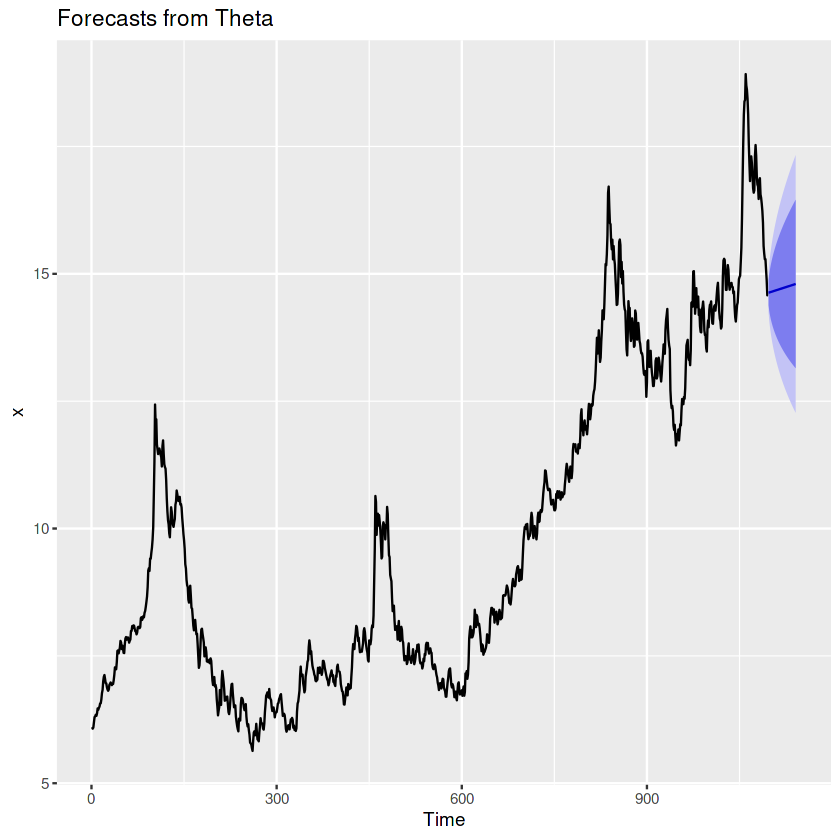

In [42]:
#Theta -- Smotthing
fit_theta=thetaf(train, h=length(test))
autoplot(fit_theta)

a5<-forecast::accuracy(fit_theta$mean, test);a5
smape(test,fit_theta$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.3164098,0.5887008,0.4639586,2.083482,3.148704,0.8258494,2.272228


[1] 0.03211175

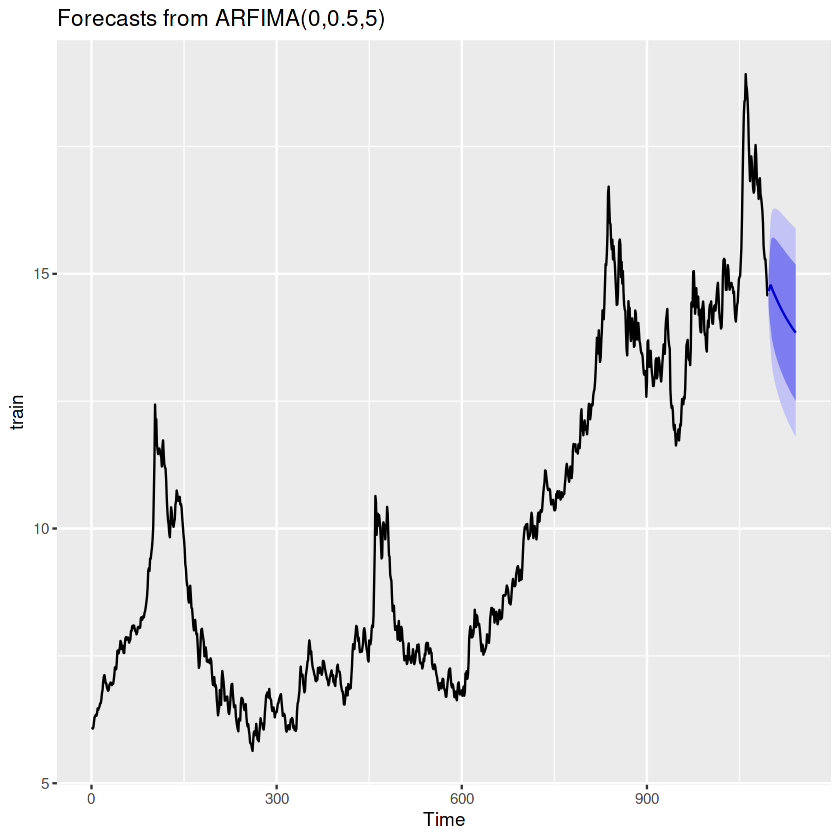

In [43]:
#ARFIMA model -- Classical
fit_ARFIMA=arfima(train)
predARFIMA = forecast::forecast(fit_ARFIMA, h=length(test))
autoplot(predARFIMA)

a6<-forecast::accuracy(predARFIMA$mean, test);a6
smape(test,predARFIMA$mean)

In [ ]:
#fitting ANN -- ML Model
fit_ANN = mlp(train)
predANN = forecast::forecast(fit_ANN, h=length(test))
autoplot(predANN)

a7<-forecast::accuracy(predANN$mean, test);a7
smape(test,predANN$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.04154859,0.4314683,0.357021,0.1963299,2.452851,0.8006355,1.700428


[1] 0.02450434

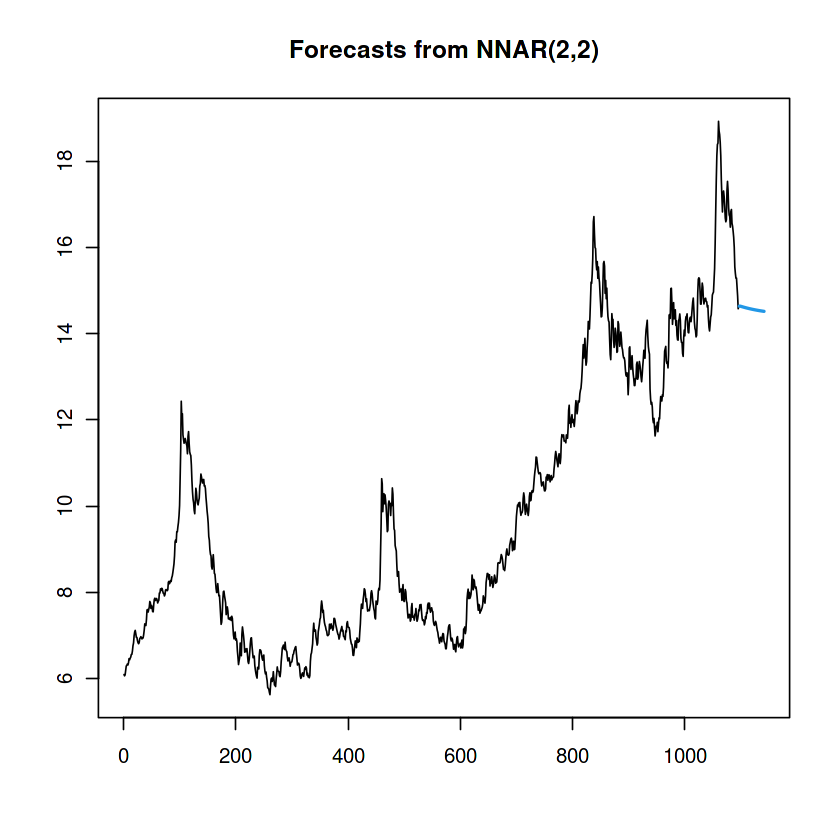

In [44]:
#fitting ARNN model -- ML Model
fit_ARNN = nnetar(train)
predARNN=forecast::forecast(fit_ARNN, h= length(test))
plot(predARNN)

a8<-forecast::accuracy(predARNN$mean, test);a8
smape(test, predARNN$mean)

Warning message in preprocess(y, m, lags, keep, difforder, sel.lag, allow.det.season, :
“No inputs left in the network after pre-selection, forcing AR(1).”


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.05467021,0.4361523,0.3552781,-0.4636007,2.456776,0.8046454,1.738378


[1] 0.02438271

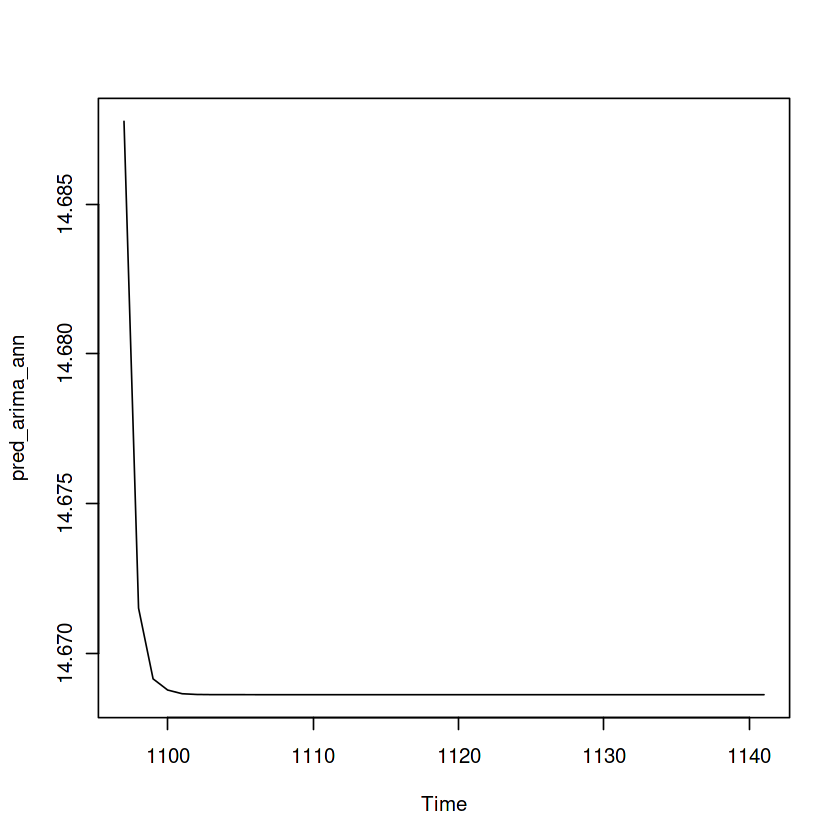

In [45]:
#fitting ARIMA + ANN hyybrid
fit_res_ANN=mlp(fitARIMA$residuals)
pred_res_ANN = forecast::forecast(fit_res_ANN, h=length(test))
pred_arima_ann=predARIMA$mean+pred_res_ANN$mean
plot(pred_arima_ann)

a9<-forecast::accuracy(pred_arima_ann, test);a9
smape(test,pred_arima_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.05357836,0.4360286,0.3552304,-0.4561245,2.456262,0.8045444,1.737746


[1] 0.02437947

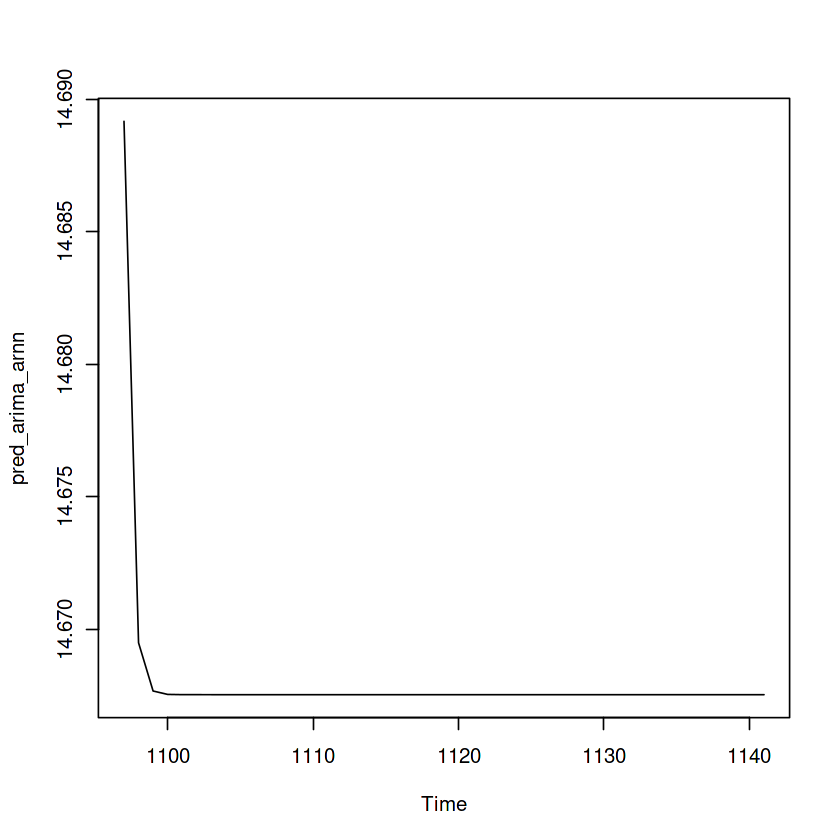

In [46]:
#fitting ARIMA + ARNN hybrid
fit_res_ARNN=nnetar(fitARIMA$residuals)
pred_res_ARNN = forecast::forecast(fit_res_ARNN, h=length(test))
pred_arima_arnn=predARIMA$mean+pred_res_ARNN$mean
plot(pred_arima_arnn)

a10<-forecast::accuracy(pred_arima_arnn, test);a10
smape(test,pred_arima_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.03772689,0.4298406,0.3537897,0.1701503,2.431012,0.8027658,1.692271


[1] 0.02428059

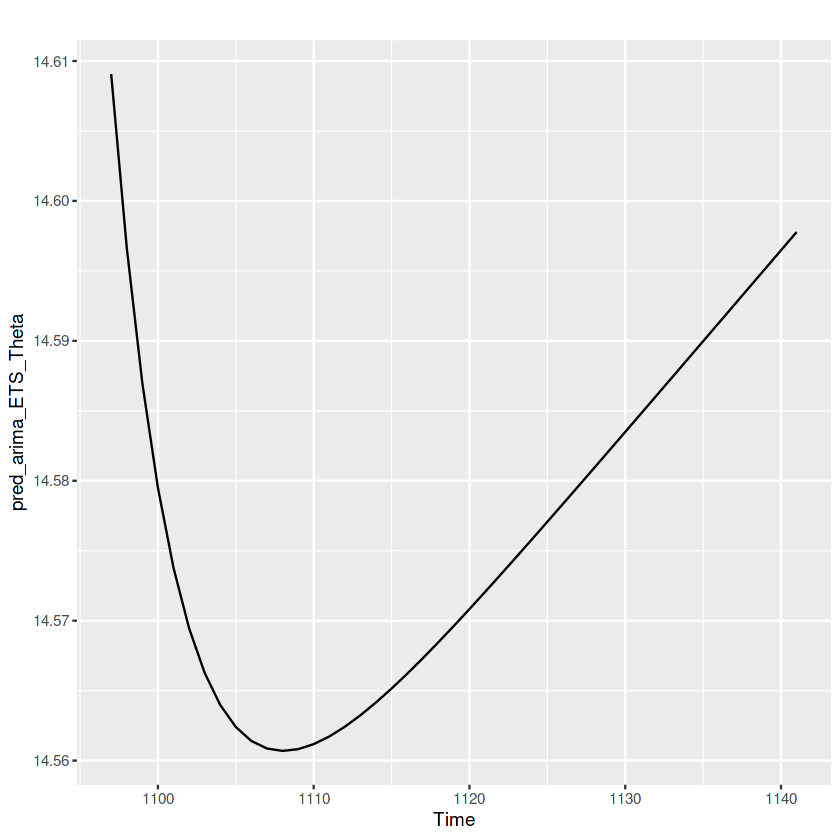

In [47]:
#ARIMA+ETS+THETA
pred_arima_ETS_Theta = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*fit_theta$mean))
autoplot(pred_arima_ETS_Theta)

a11<-forecast::accuracy(pred_arima_ETS_Theta, test);a11
smape(test,pred_arima_ETS_Theta)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.08515511,0.4342825,0.3611013,0.4955401,2.473454,0.7992422,1.701385


[1] 0.024783

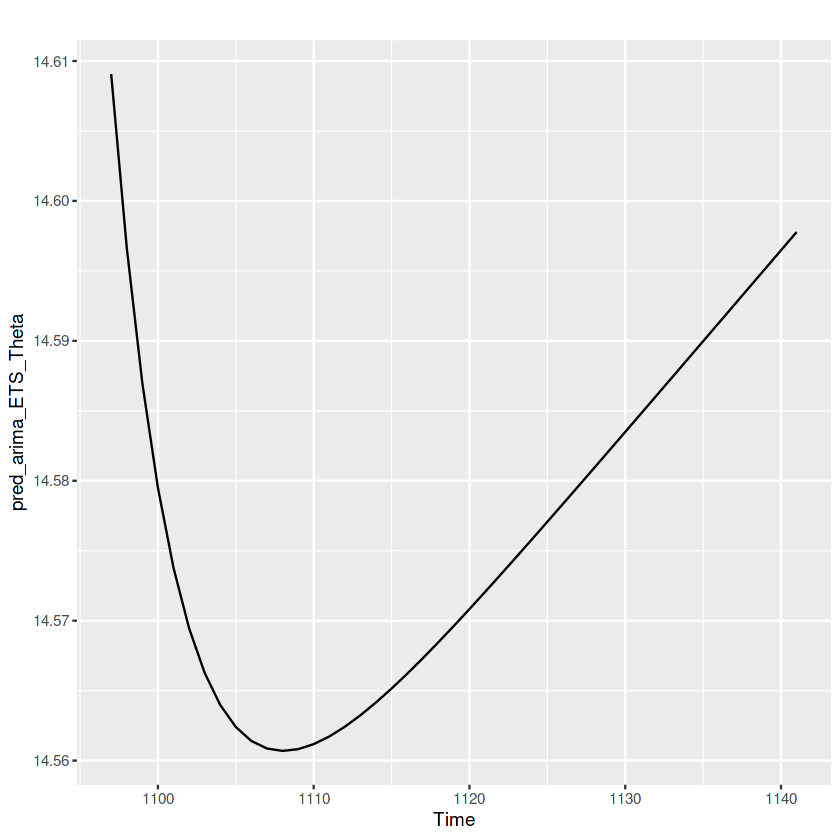

In [48]:
#ARIMA+ETS+ARNN
pred_arima_ETS_ARNN = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_ETS_Theta)

a12<-forecast::accuracy(pred_arima_ETS_ARNN, test);a12
smape(test,pred_arima_ETS_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.02291124,0.433139,0.355866,-0.2460522,2.455415,0.8050859,1.718023


[1] 0.02442296

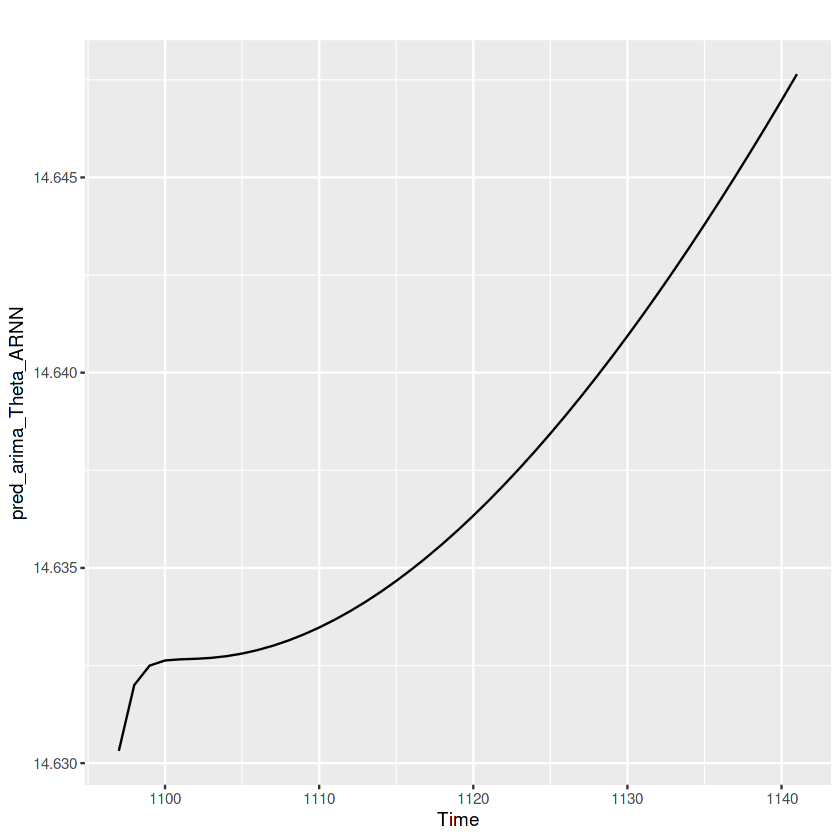

In [49]:
#ARIMA+theta+ARNN
pred_arima_Theta_ARNN = ((0.333*predARIMA$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_Theta_ARNN)

a13<-forecast::accuracy(pred_arima_Theta_ARNN, test);a13
smape(test,pred_arima_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06933144,0.4320388,0.3581449,0.3869462,2.45567,0.8008116,1.694496


[1] 0.02457906

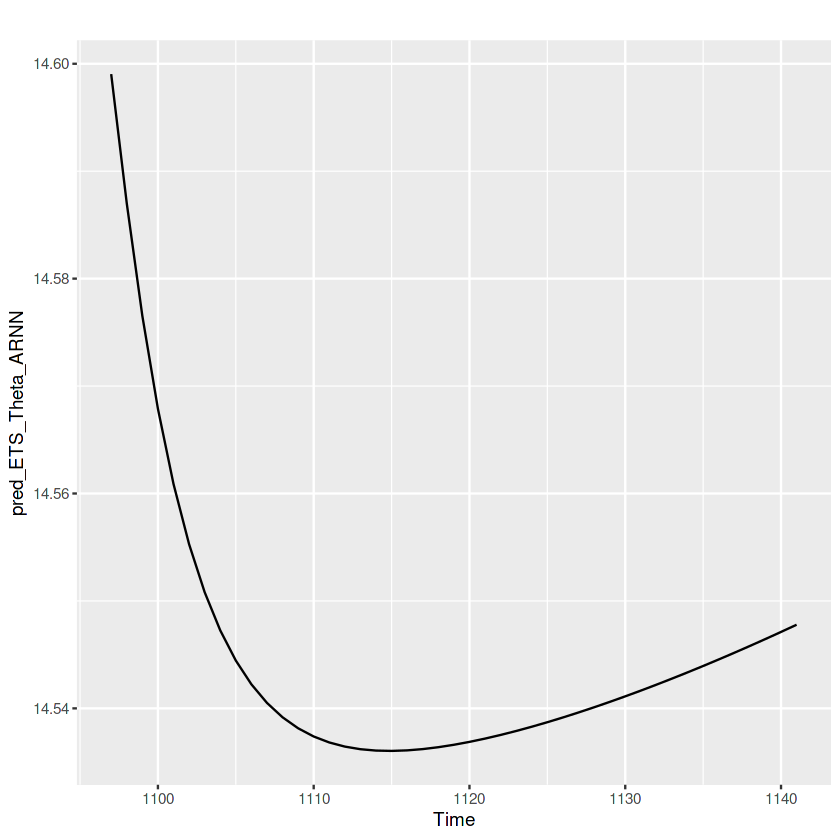

In [50]:
#ETS+theta+ARNN
pred_ETS_Theta_ARNN = ((0.333*predETS$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_ETS_Theta_ARNN)

a14<-forecast::accuracy(pred_ETS_Theta_ARNN, test);a14
smape(test,pred_ETS_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1.207803,1.484395,1.207803,8.1986,8.1986,0.8992503,5.7398


[1] 0.0874017

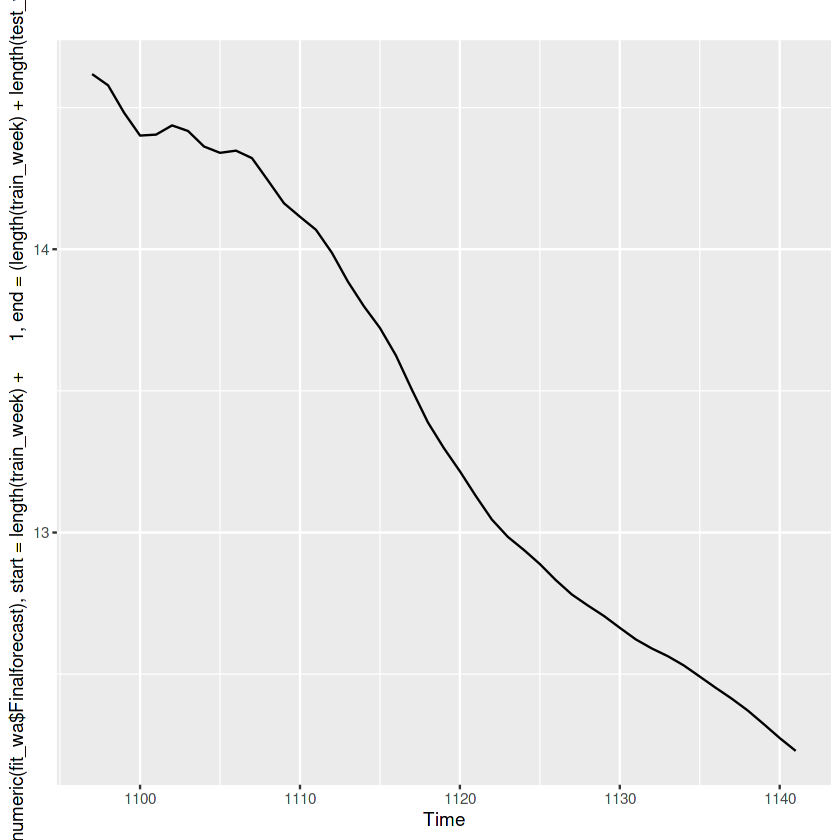

In [51]:
#WaveletArima -- Advanced
fit_wa <- WaveletFittingarma(train, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))
autoplot(ts(as.numeric(fit_wa$Finalforecast), start = length(train_week)+1, end = (length(train_week) + length(test_week))))

a15<-forecast::accuracy(fit_wa$Finalforecast, test);a15
smape(test,fit_wa$Finalforecast)

In [53]:
#ANN+ARNN+WARIMA
# pred_ANN_ARNN_WARIMA = ((0.333*predANN$mean) + (0.333*fit_wa$Finalforecast) + (0.333*predARNN$mean))
# autoplot(pred_ANN_ARNN_WARIMA)

# a14<-forecast::accuracy(pred_ANN_ARNN_WARIMA, test);a14
# smape(test,pred_ANN_ARNN_WARIMA)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1.221881,1.462898,1.221881,8.293764,8.293764,0.8890264,5.655523


[1] 0.08818024

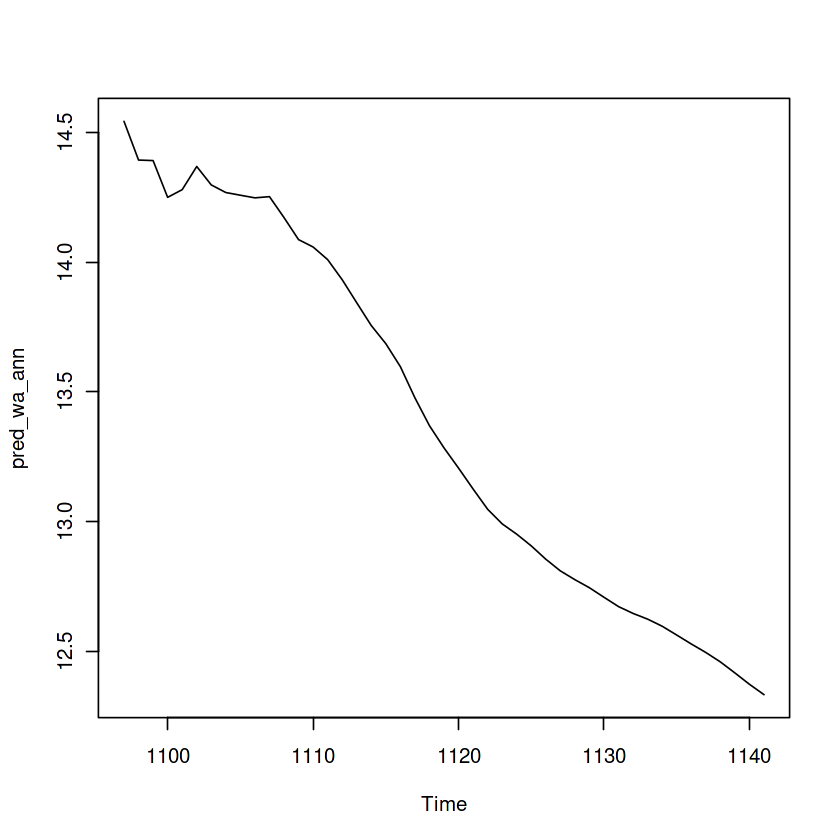

In [54]:
#fitting WARIMA+ANN hybrid model
res_wa = train - fit_wa$FinalPrediction
fit_wa_ANN=mlp(res_wa)
pred_wa_ANN = forecast::forecast(fit_wa_ANN, h=length(test))
pred_wa_ann=fit_wa$Finalforecast+pred_wa_ANN$mean
a16<-forecast::accuracy(pred_wa_ann, test);a16
plot(pred_wa_ann)

smape(test,pred_wa_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1.171839,1.451963,1.171839,7.950722,7.950722,0.8944943,5.613526


[1] 0.08467861

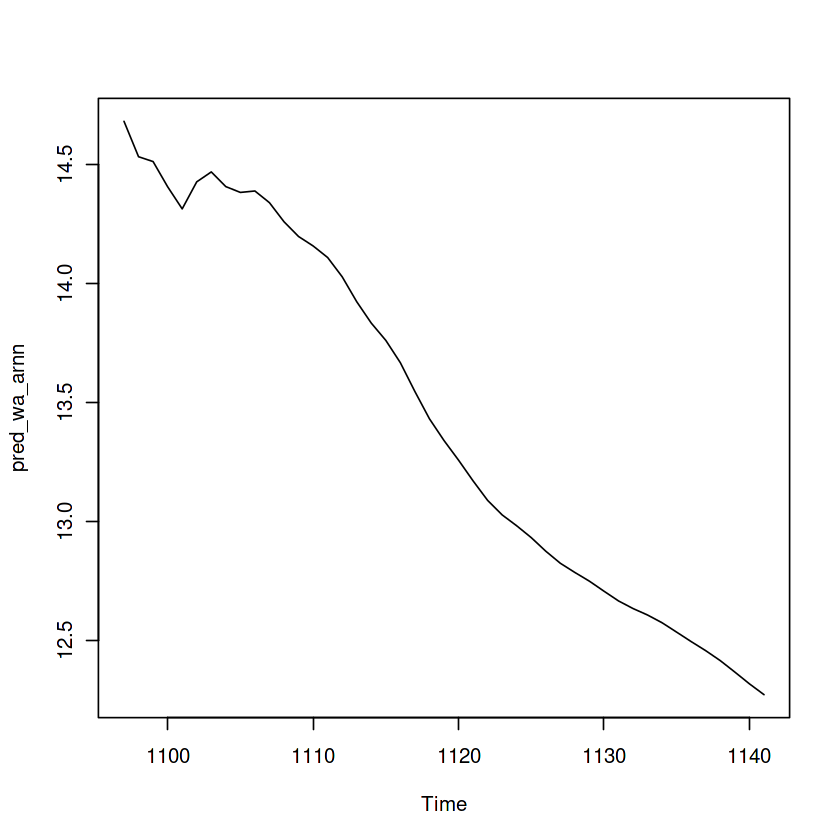

In [55]:
#fitting WARIMA + ARNN hybrid model
fit_wa_ARNN = nnetar(res_wa)
pred_wa_ARNN = forecast::forecast(fit_wa_ARNN, h=length(test))
pred_wa_arnn=fit_wa$Finalforecast+pred_wa_ARNN$mean
a17<-forecast::accuracy(pred_wa_arnn, test);a17
plot(pred_wa_arnn)

smape(test,pred_wa_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.02040281,0.4397194,0.3622161,-0.2301335,2.498686,0.8143187,1.736974


[1] 0.02485777

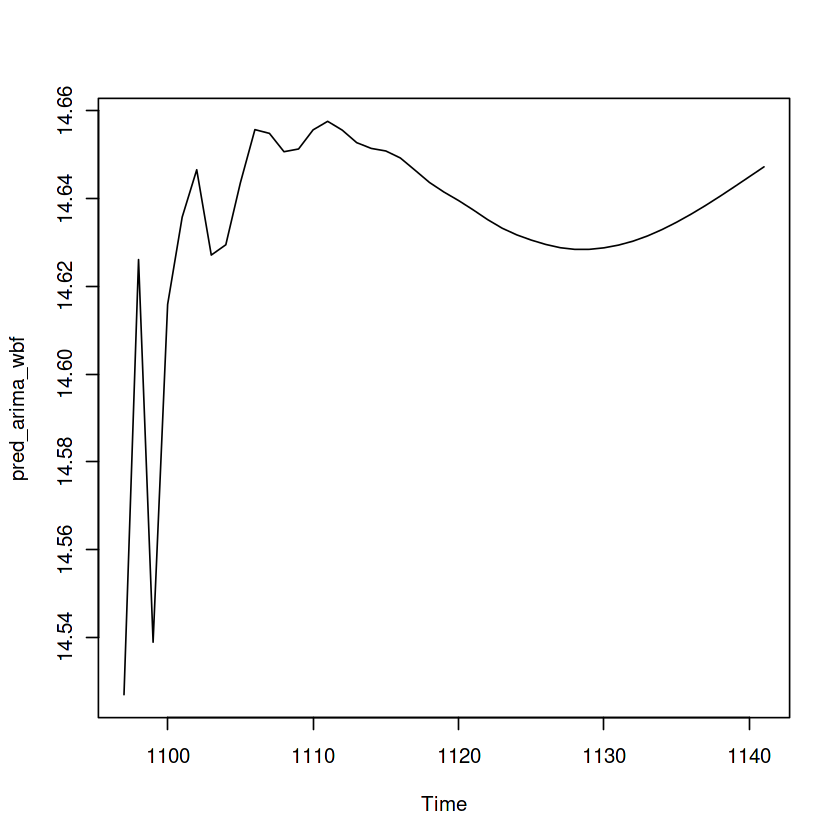

In [56]:
#fitting ARIMA + WARIMA hybrid model
fit_res_wbf=WaveletFittingarma(fitARIMA$residuals, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))

pred_arima_wbf=predARIMA$mean+fit_res_wbf$Finalforecast
a18<-forecast::accuracy(pred_arima_wbf, test);a18
plot(pred_arima_wbf)

smape(test,pred_arima_wbf)

=-=-=-=-= Iteration 0 Fri Dec 17 10:34:41 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Fri Dec 17 10:34:48 2021 =-=-=-=-=
=-=-=-=-= Iteration 1800 Fri Dec 17 10:34:55 2021 =-=-=-=-=
=-=-=-=-= Iteration 2700 Fri Dec 17 10:35:02 2021 =-=-=-=-=
=-=-=-=-= Iteration 3600 Fri Dec 17 10:35:10 2021 =-=-=-=-=
=-=-=-=-= Iteration 4500 Fri Dec 17 10:35:17 2021 =-=-=-=-=
=-=-=-=-= Iteration 5400 Fri Dec 17 10:35:24 2021 =-=-=-=-=
=-=-=-=-= Iteration 6300 Fri Dec 17 10:35:31 2021 =-=-=-=-=
=-=-=-=-= Iteration 7200 Fri Dec 17 10:35:39 2021 =-=-=-=-=
=-=-=-=-= Iteration 8100 Fri Dec 17 10:35:46 2021 =-=-=-=-=


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.640132,0.8460435,0.6891312,4.299503,4.657391,0.8411903,3.252477


[1] 0.04821657

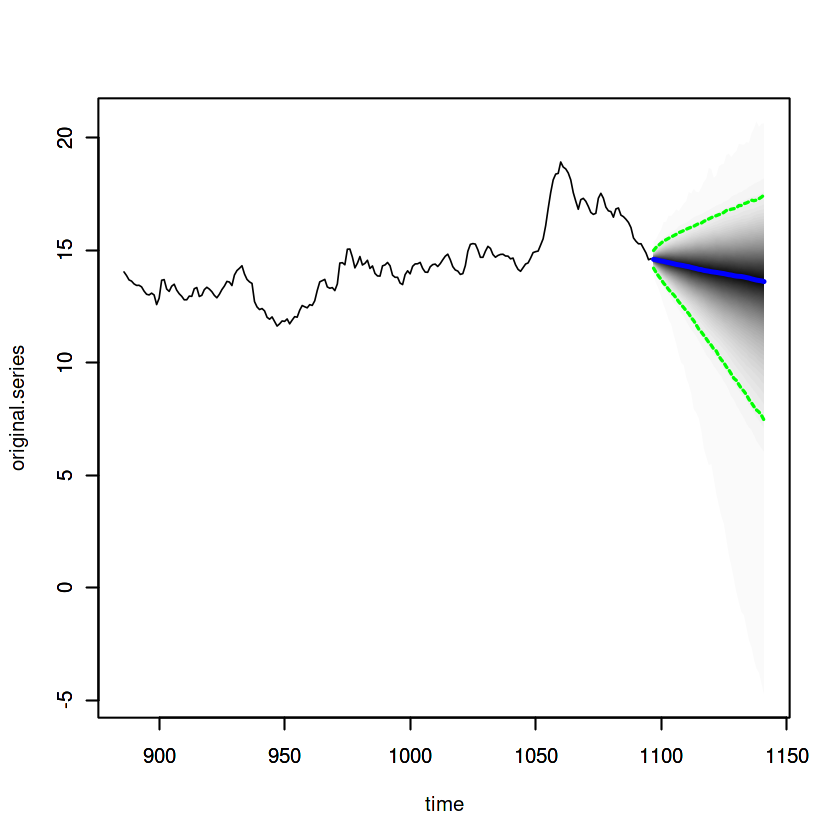

In [57]:
#fitting BSTS model -- Advanced
ss <- AddLocalLinearTrend(list(), train)
fit_bsts=bsts(train,state.specification = ss, niter = 9000)
predBSTS <- predict(fit_bsts, horizon = length(test))
plot(predBSTS, plot.original = 211)

burn <- SuggestBurn(0.1, fit_bsts)
fitted_bsts=as.numeric(-colMeans(fit_bsts$one.step.prediction.errors[-(1:burn),])+train)

a19<-forecast::accuracy(predBSTS$mean, test);a19
smape(test,predBSTS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.01094365,0.4332406,0.3565025,-0.1642151,2.457813,0.8051477,1.71606


[1] 0.02446646

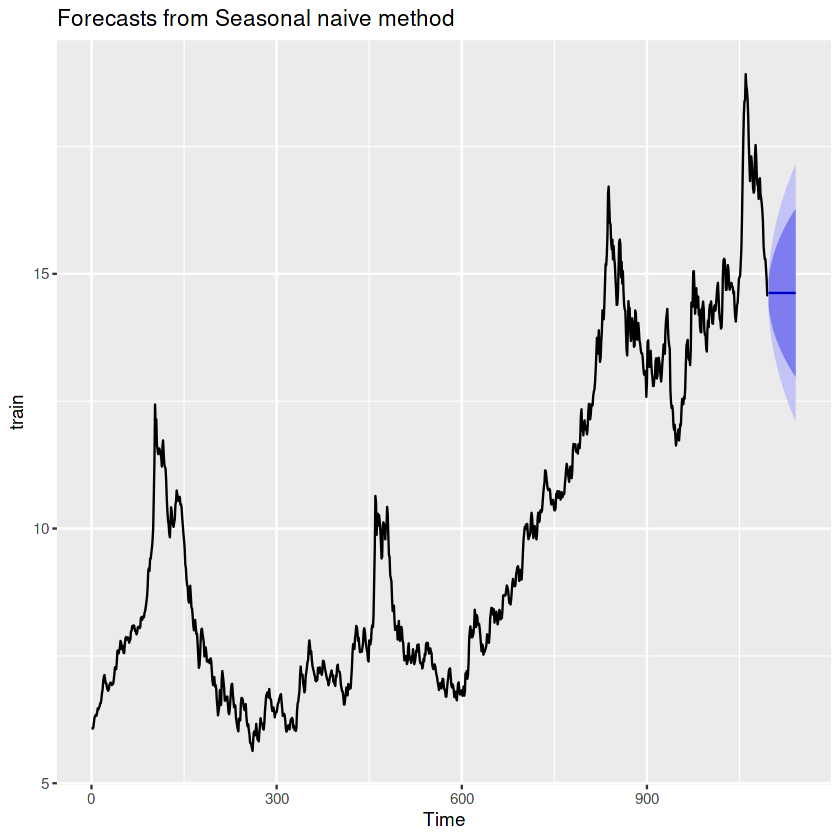

In [58]:
#Snaive - ARIMA(0,0,0)(0,1,0)m  --  Classical
fit_snaive = snaive(train, h=length(test))
autoplot(fit_snaive)

a20<-forecast::accuracy(fit_snaive$mean, test);a20
smape(test,fit_snaive$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.01093897,0.4332405,0.3565026,-0.1641831,2.457813,0.8051477,1.716059


[1] 0.02446646

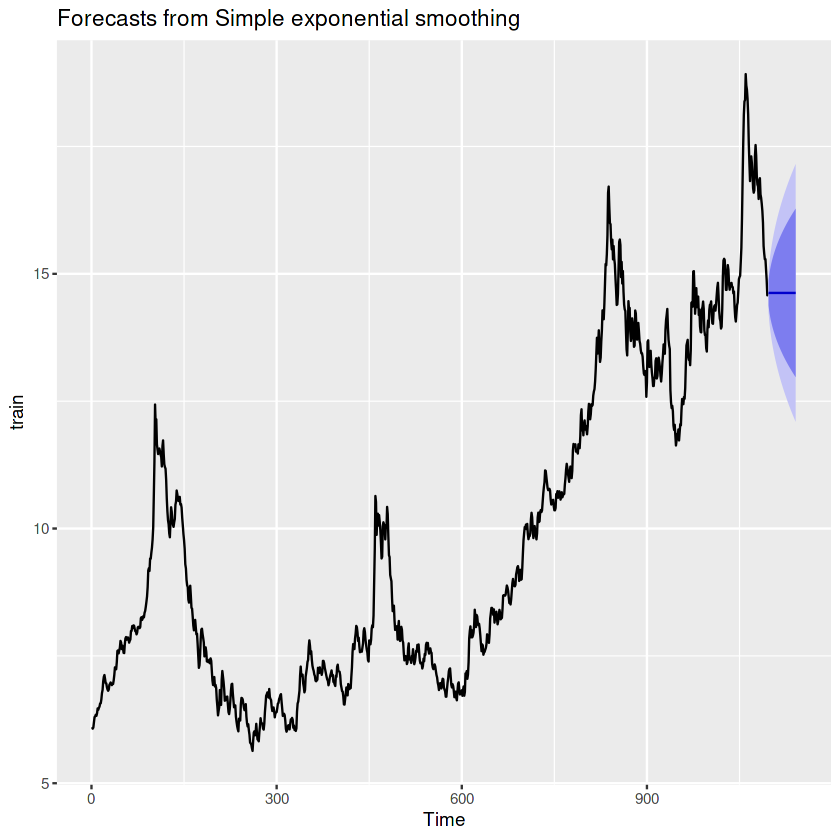

In [59]:
#Ses --  Simple exponential smoothing
fit_ses = ses(train, h=length(test))
autoplot(fit_ses)

a21<-forecast::accuracy(fit_ses$mean, test);a21
smape(test,fit_ses$mean)

In [60]:
#Dynamic regression ARIMA model is discussed in paper 2, 
#but in the fourier, the K (wavenumber) must not be greater than period/2 ,period here is 1 
#m1
# xreg <- fourier(train, K=1)
# model <- auto.arima(train, xreg = xreg, seasonal = FALSE)
# xreg1 <- fourier(train, K=1, h = length(test))
# Pred1 <- forecast(model, xreg = xreg1)
# autoplot(Pred1)

# a22<-forecast::accuracy(Pred1, test);a22
# smape(test,Pred$mean)

**Catboost**

In [61]:
# Importing Catboost
failed_loading_catboost = FALSE
tryCatch(library(catboost), error = function(err) {failed_loading_catboost<<-TRUE})

In [62]:
# Initializing Catboost parameters
lag=1
embedded_series <- NULL
series_means <- NULL
mean <- mean(train)
train_cat <- train/mean
series_means <- c(series_means, mean)
embedded <- embed(train_cat, lag + 1)
embedded_series <- rbind(embedded_series, embedded)

final_lags <- NULL
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_cat <- rbind(final_lags, current_series_final_lags)

In [63]:
# Fitting the CatBoost model
if (failed_loading_catboost) stop("Error when loading catboost, cannot run global model based on catboost")
    train_pool <- catboost.load_pool(data = as.matrix(embedded_series[,-1]),label=as.matrix(embedded_series[,1]))
    model_cat <- catboost.train(train_pool)

Training catboost with default parameters! See help(catboost.train).



Learning rate set to 0.039666
0:	learn: 0.3113755	total: 49.3ms	remaining: 49.3s
1:	learn: 0.2999530	total: 50.4ms	remaining: 25.2s
2:	learn: 0.2888489	total: 51.5ms	remaining: 17.1s
3:	learn: 0.2782039	total: 52.2ms	remaining: 13s
4:	learn: 0.2679911	total: 53.3ms	remaining: 10.6s
5:	learn: 0.2581749	total: 54.4ms	remaining: 9.01s
6:	learn: 0.2488210	total: 55.3ms	remaining: 7.84s
7:	learn: 0.2396770	total: 56.2ms	remaining: 6.97s
8:	learn: 0.2312091	total: 57.3ms	remaining: 6.31s
9:	learn: 0.2226612	total: 58.2ms	remaining: 5.76s
10:	learn: 0.2145021	total: 59.2ms	remaining: 5.32s
11:	learn: 0.2067052	total: 60ms	remaining: 4.94s
12:	learn: 0.1992301	total: 60.9ms	remaining: 4.62s
13:	learn: 0.1919937	total: 61.7ms	remaining: 4.35s
14:	learn: 0.1849440	total: 62.4ms	remaining: 4.1s
15:	learn: 0.1782264	total: 63.1ms	remaining: 3.88s
16:	learn: 0.1719338	total: 63.8ms	remaining: 3.69s
17:	learn: 0.1657309	total: 64.4ms	remaining: 3.51s
18:	learn: 0.1596616	total: 65ms	remaining: 3.35s

In [64]:
# Predictions in Catboost model
predictions <- NULL
for (i in 1:length(test)){
    catboost_final_lags <- catboost.load_pool(final_lags_cat)
    new_predictions <- catboost.predict(model_cat, catboost_final_lags)
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_cat <- final_lags_cat[-lag]
      final_lags_cat <- cbind(new_predictions, final_lags_cat)
      colnames(final_lags_cat)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_cat <- as.data.frame(final_lags_cat)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred = as.numeric(pred)
predictions_cat <- pred * as.vector(series_means)

In [65]:
# Catboots Accuracy
smape(test,predictions_cat)
a23<-forecast::accuracy(predictions_cat,test);a23

[1] 0.02448892

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.003807378,0.4331191,0.3568303,-0.06319065,2.457575,0.8051477,1.711972


**Pool regression**

In [66]:
# Initializing Pool regression paramters
lag=1
final_lags_poolreg <- final_lags
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_poolreg <- rbind(final_lags_poolreg, current_series_final_lags)
colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")

embedded_series <- as.data.frame(embedded_series)
colnames(embedded_series)[1] <- "y"
colnames(embedded_series)[2:(lag + 1)] <- paste("Lag", 1:lag, sep = "")

formula <- "y ~ "
  for(predictor in 2:ncol(embedded_series)){
    if(predictor != ncol(embedded_series)){
      formula <- paste0(formula, colnames(embedded_series)[predictor], " + ")
    }else{
      formula <- paste0(formula, colnames(embedded_series)[predictor])
    }
  }

formula <- paste(formula, "+ 0", sep="")
formula <- as.formula(formula)

In [67]:
# Fitting Pool Regression model
model_pool_reg <- glm(formula = formula, data = embedded_series)

In [68]:
# Predictions in Pool regression model
predictions <- NULL
for (i in 1:length(test)){
    new_predictions <- predict.glm(object = model_pool_reg, newdata = as.data.frame(final_lags_poolreg))
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_poolreg <- final_lags_poolreg[-lag]
      final_lags_poolreg <- cbind(new_predictions, final_lags_poolreg)
      colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_poolreg <- as.data.frame(final_lags_poolreg)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred <- as.numeric(pred)
predictions_poolreg <- pred * as.vector(series_means)

In [69]:
# Pool regression model accuracy
smape(test,predictions_poolreg)
a24 <- forecast::accuracy(test,predictions_poolreg); a24

[1] 0.02741272

,ME,RMSE,MAE,MPE,MAPE
Test set,0.2111989,0.5014791,0.4000786,1.417196,2.700269
